In [1]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#Load Data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [3]:
#Identifikasi data
df.info() #Memeriksa Tipe Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [4]:
# Menghitung persentase duplikasi
percentage_duplicates = (df.duplicated().sum() / df.shape[0]) * 100

print("Jumlah duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data
print(f"Persentase duplikasi: {percentage_duplicates:.2f}%")

Jumlah duplikasi :  723
Persentase duplikasi: 70.54%


In [5]:
df.describe() #Memeriksa Parameter Statistik

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [6]:
#cleaning data
df.drop_duplicates(inplace=True) #Menghapus Data Duplikat

In [7]:
print("Jumlah Duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data

Jumlah Duplikasi :  0


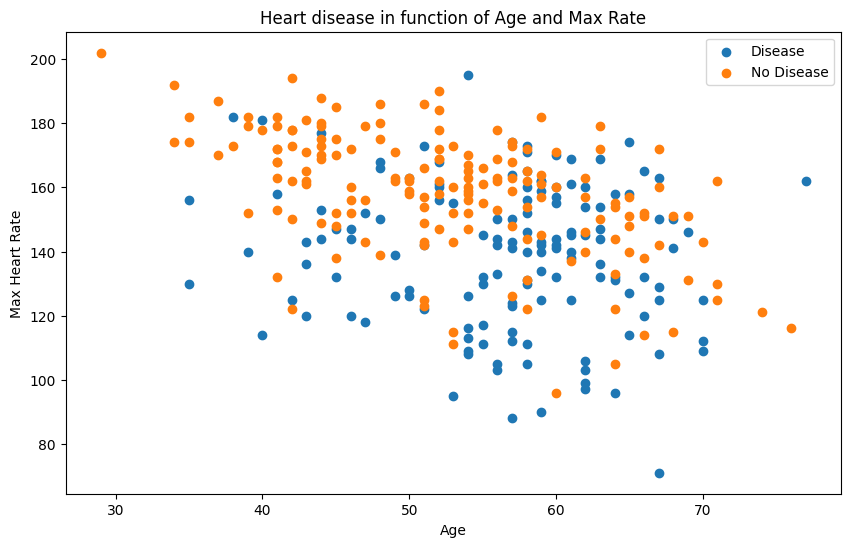

In [9]:
plt.figure(figsize=(10,6))

#Target = 0 (No Heart Disease)
plt.scatter(x = df[df['target']==0]['age'], y = df.Max_heart_rate[df.target==0])
#Target = 1 (Heart Disease)
plt.scatter(x = df[df['target']==1]['age'], y = df.Max_heart_rate[df.target==1],);

plt.title("Heart disease in function of Age and Max Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

Text(0, 0.5, 'Resting Blood Pressure (mm Hg)')

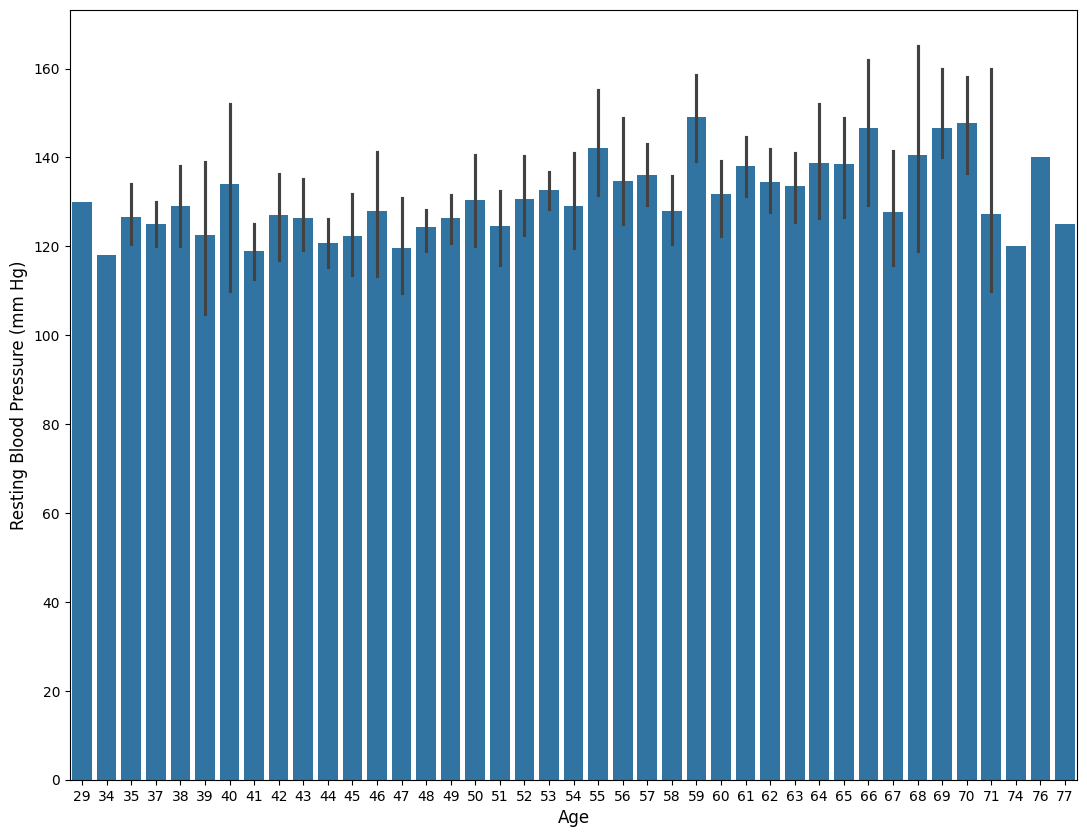

In [10]:
plt.figure(figsize=(13,10))
sns.barplot(x=df["age"],y=df["resting_blood_pressure"])
plt.xlabel('Age',fontsize=12)
plt.ylabel('Resting Blood Pressure (mm Hg)',fontsize=12)

In [13]:
#Feature Engineering
#Mengganti Kolom Sex
df["sex"].replace({"Male" : 1,
                   "Female" : 0}, inplace=True)
#Mengganti Kolom Chest Pain
df["chest_pain_type"].replace({"Typical angina" : 1,
                                  "Atypical angina" : 2,
                                  "Non-anginal pain" : 3,
                                  "Asymptomatic" : 4}, inplace=True)
#Mengganti Kolom Fasting Blood Sugar
df["fasting_blood_sugar"].replace({"Greater than 120 mg/ml" : 1,
                                   "Lower than 120 mg/ml" : 0}, inplace=True)
#Mengganti Kolom Resting Electrocardiographic
df["rest_ecg"].replace({"Normal" : 0,
                       "ST-T wave abnormality" : 1,
                       "Left ventricular hypertrophy" : 2}, inplace=True)
#Mengganti Kolom Exercise Induced Angina
df["exercise_induced_angina"].replace({"Yes" : 1,
                                       "No" : 0}, inplace=True)
#Mengganti Kolom Slope
df["slope"].replace({"Upsloping" : 1,
                     "Flat" : 2,
                     "Downsloping" : 3}, inplace=True)
#Mengganti Vessels Colored By Flourosopy
df["vessels_colored_by_flourosopy"].replace({"Zero" : 0,
                                             "One" : 1,
                                             "Two" : 2,
                                             "Three" : 3,
                                             "Four" : 4}, inplace=True)
#Mengganti Kolom
df["thalassemia"].replace({"Normal" : 3,
                        "Fixed Defect" : 6,
                        "Reversable Defect" : 7,
                          "No" : 0}, inplace=True)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,3,2,7,0
1,53,1,1,140,203,1,0,155,1,3.1,1,0,7,0
2,70,1,1,145,174,0,1,125,1,2.6,1,0,7,0
3,61,1,1,148,203,0,1,161,0,0.0,3,1,7,0
4,62,0,1,138,294,1,1,106,0,1.9,2,3,6,0


In [14]:
#Persiapan data menjadi model
sc=StandardScaler()
X=df.drop('target',axis=1)
Y=df['target']
df=sc.fit(X).transform(X)

In [15]:
#Pisahkan data train dan test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=3)


In [17]:
#Menyusun model, evaluasi dan klasifikasi
def model(X_train,y_train):
    models=[]
   #Random Forest Classifier
    rfc=RandomForestClassifier()
    rfc.fit(X_train,y_train)
    models.append(rfc)
    #XGBoost
    xgb=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1)
    xgb.fit(X_train,y_train)
    models.append(xgb)



In [18]:
models=model(X_train,y_train) #Penampung Nilai X Train dan y Train

In [22]:
Model=['RandomForestClassifier','XgBoost']

In [31]:
# Inisialisasi model-modelnya
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Fit model ke data latih
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Simpan model dalam sebuah list
models = [rf, gb]

# Menghitung Akurasi
train_accuracy=[]
test_accuracy=[]
for i in range(len(models)):
    yhat = models[i].predict(X_test)
    yhat_t = models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t, y_train))
    test_accuracy.append(accuracy_score(yhat, y_test))

In [32]:
Accuracy_score=pd.DataFrame({
    'Model':Model,
    'Train_Accuracy':train_accuracy,
    'Test_Accuracy':test_accuracy
})

In [33]:
Accuracy_score #Melihat Skor Akurasi

,Model,Train_Accuracy,Test_Accuracy
0,RandomForestClassifier,1.0,0.815789
1,XgBoost,1.0,0.776316


In [35]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) #Membuat Dictionary Dari Hasil Akurasi
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])} #Mengurutkan Dictionary Berdasarkan Nilai Akurasi

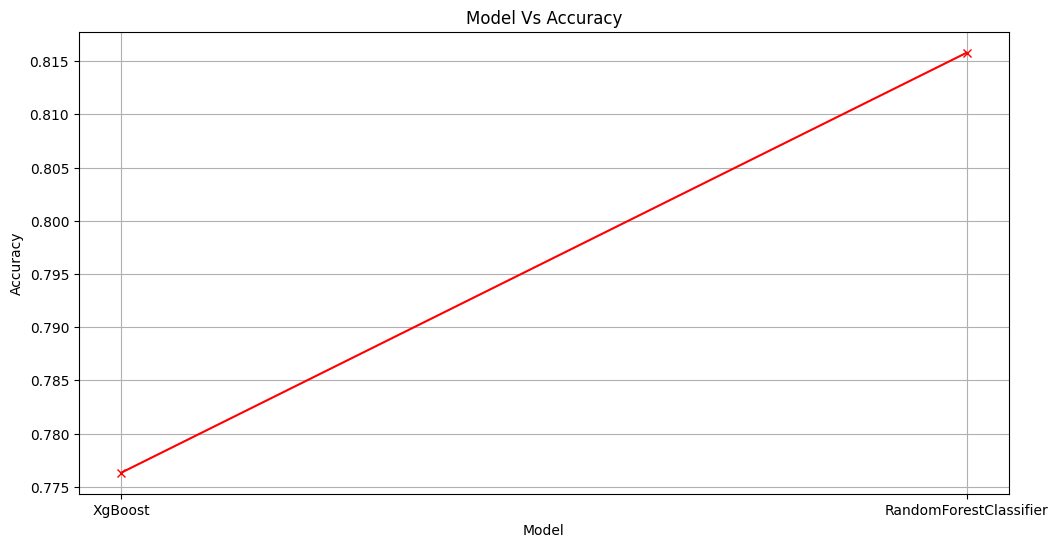

In [36]:
#Membuat Grafik Perbandingan Model dan Akurasi
plt.figure(figsize=(12,6))
plt.plot(list(score.keys()),list(score.values()),marker='x',color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')
plt.grid()

In [37]:
#Model Terbaik
best_model = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]
print("Model terbaik berdasarkan akurasi pada data uji:")
print(best_model)

Model terbaik berdasarkan akurasi pada data uji:
Model             RandomForestClassifier
Train_Accuracy                       1.0
Test_Accuracy                   0.815789
Name: 0, dtype: object


In [38]:
# Ambil model dengan akurasi tertinggi dari Accuracy_score
best_model_name = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]['Model']
best_model_index = Model.index(best_model_name)
best_model = models[best_model_index]

# Lakukan prediksi pada data uji
y_pred = best_model.predict(X_test)

#Model Evaluation
print(accuracy_score(y_test,y_pred))

0.8157894736842105


In [39]:
# Prediksi pada data baru (contoh: data test)
# Misalnya, kita akan menggunakan satu baris dari data uji sebagai contoh
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = gb.predict(sample_data)
print("Prediction:", prediction)

Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Evaluasi model dengan mencetak laporan klasifikasi
print("Laporan Klasifikasi untuk Model Terbaik:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi untuk Model Terbaik:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        37
           1       0.78      0.90      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



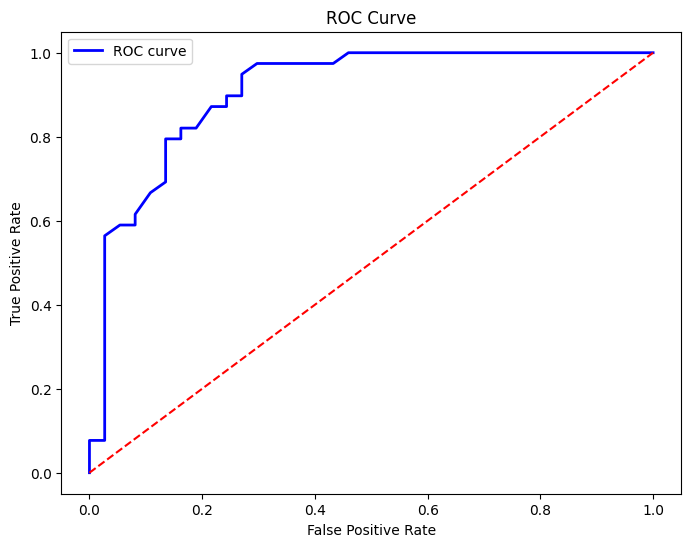

Area under the ROC curve (AUC): 0.91


In [41]:
# Mendapatkan nilai keputusan dari model terbaik
y_scores = best_model.predict_proba(X_test)[:, 1]

# Menghitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hitung Area di Bawah Kurva ROC (AUC)
auc = roc_auc_score(y_test, y_scores)
print(f"Area under the ROC curve (AUC): {auc:.2f}")

Kesimpulan:
Random Forest adalah model dengan akurasi terbaik yaitu 81,57%
area dibawah kurva ROC yaitu 91%